In [237]:
import os
from copy import deepcopy
import numpy as np
import pandas as pd
from data_median_dist import *
from base_density import *
from basis_function import *
import seaborn

from scorematching_finexpfam import *
from evaluate_scorematching_loss import *
from negloglik_finexpfam import *
from unnormalized_density import *
from plot_density_1d import *

import scipy 

from datetime import datetime 

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
%matplotlib inline 

import matplotlib.gridspec as gridspec

In [2]:
os.chdir('/home/zhouc1/notebooks/definexpfam_results/simulation_4points')

In [3]:
df = np.array([-10.0, -5.0, 5.0, 10.0]).reshape(-1, 1)
landmarks = df
# np.save('data.npy', df)
xlimit = (-20.0, 20.0)
ylimit = (-0.005, 0.2001)

In [ ]:
df

In [225]:
bw = 1.9
basis_function = GaussianBasisFunction(
    landmarks = landmarks, 
    bw = bw)
base_density = BasedenUniform(df, domain = [[xlimit[0], xlimit[1]]])

In [226]:
coef_sm = scorematching_finexpfam_coef(
    data = df, 
    basis_function = basis_function, 
    base_density = base_density)

In [227]:
coef_sm

array([[119.65604765],
       [119.65225854],
       [119.65225854],
       [119.65604765]])

In [228]:
file_name = f'4points_coef_scorematching_bw={basis_function.bw}_data.npy'
np.save(file_name, coef_sm)

In [229]:
plot_domain = xlimit
plot_pts_cnt = 1000
x0 = np.linspace(plot_domain[0], plot_domain[1], plot_pts_cnt).reshape(-1, 1)

basis_mat = basis_function.basisfunction_eval(x0)
y0 = np.matmul(basis_mat.T, coef_sm).flatten()
mu = base_density.baseden_eval(x0).flatten()

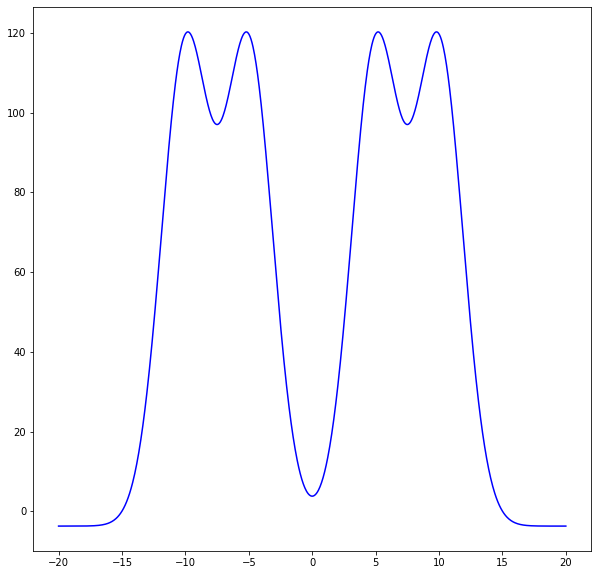

In [230]:
plt.figure(figsize=(10, 10))
plt.plot(x0, np.log(mu) + y0, 'b-')

In [231]:
np.max(np.log(mu) + y0)

120.22497981094098

In [232]:
sub_const = 100.
def density_eval_1d_cus(basis_function, base_density, coef):

    landmarks = basis_function.landmarks
    n_obs = landmarks.shape[0]
    
    def den(x): 

        den_val = (base_density.baseden_eval_1d(x) * 
                   np.exp(- sub_const + np.sum([coef[i] * basis_function.basis_x_1d(landmarks[i])(x)
                          for i in range(n_obs)])))
        
        return den_val

    return den

In [233]:
int_result, _ = scipy.integrate.quad(
    density_eval_1d_cus(
        basis_function = basis_function, 
        base_density = base_density, 
        coef = coef_sm), 
    a = xlimit[0], 
    b = xlimit[1], 
limit = 1000)
int_result

1220978157.7446017

(array([0.05, 0.05]), array([-10.,   0.,  10.]), <a list of 2 Patch objects>)

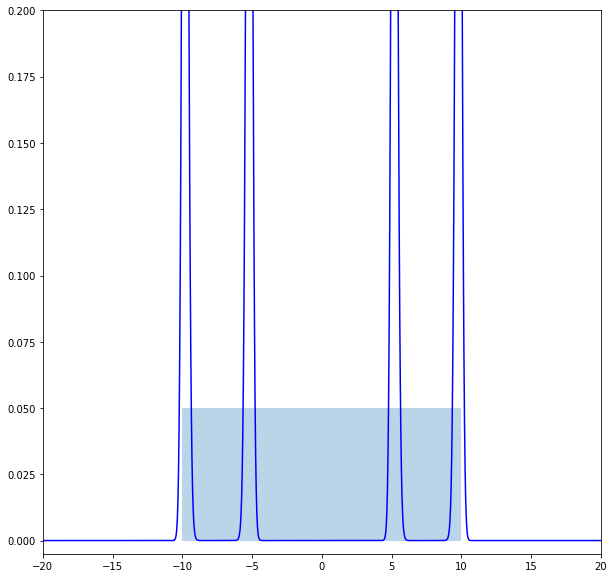

In [234]:
den_vals = mu * np.exp(y0 - sub_const) / int_result 
plt.figure(figsize = (10, 10))
plt.plot(x0, den_vals, 'b-')
plt.xlim(plot_domain)
plt.ylim(ylimit)
plt.hist(df.flatten(), density = True, bins = 'fd', alpha = 0.3)

In [235]:
file_name = f'denvals_scorematching_bw={basis_function.bw}_data.npy'
np.save(file_name, den_vals)

********************
bw = 1.5


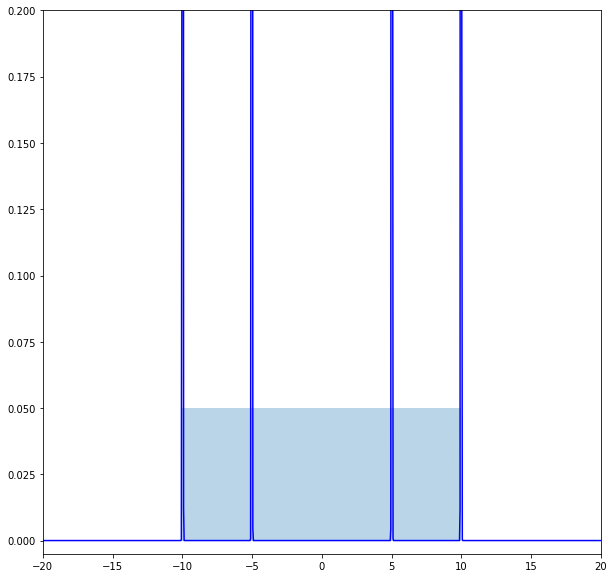

********************
bw = 2.0


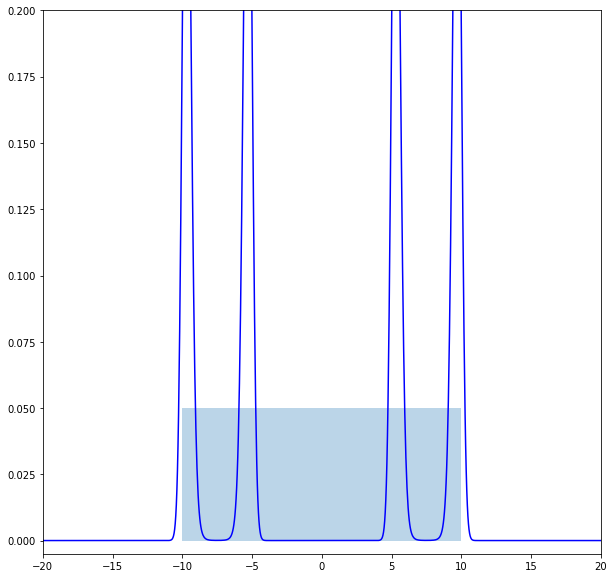

********************
bw = 2.1


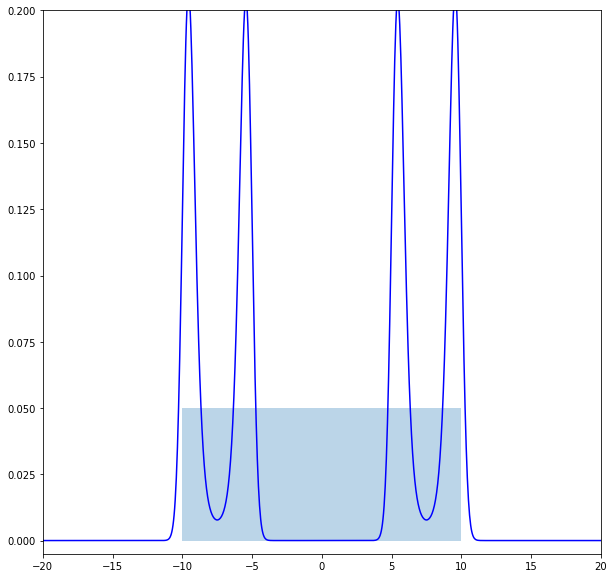

********************
bw = 2.2


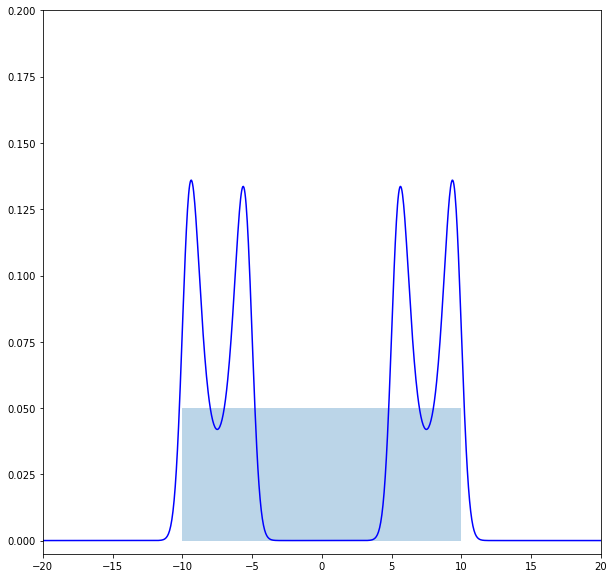

********************
bw = 2.3


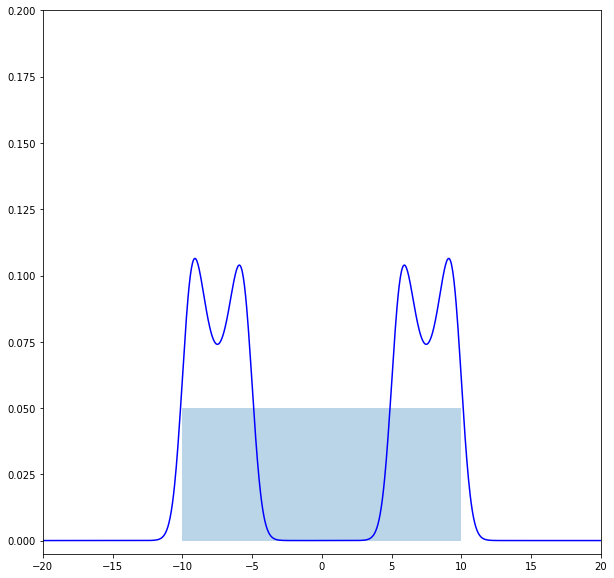

********************
bw = 2.4


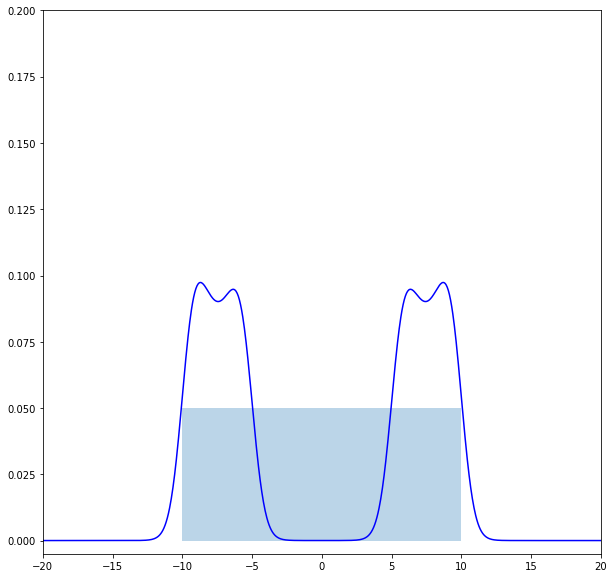

********************
bw = 2.5


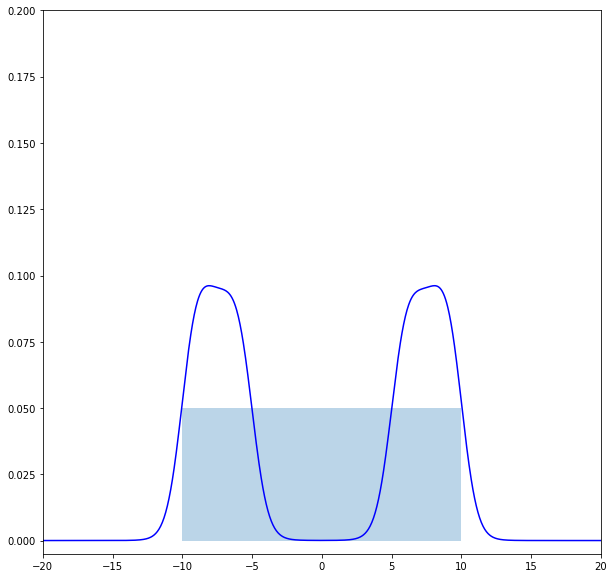

********************
bw = 2.6


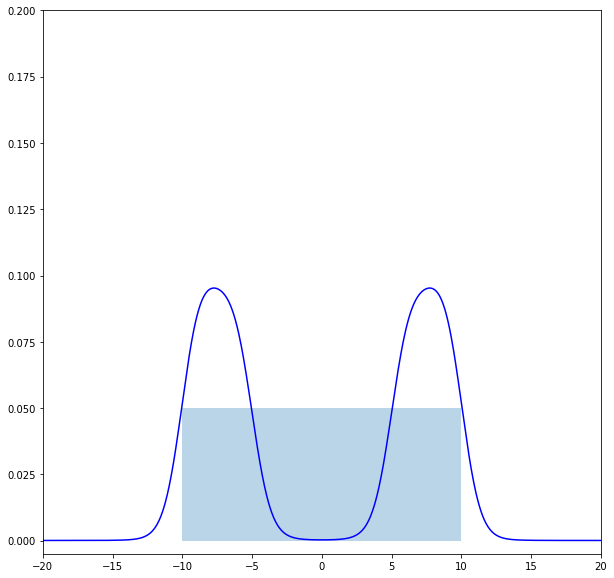

********************
bw = 2.7


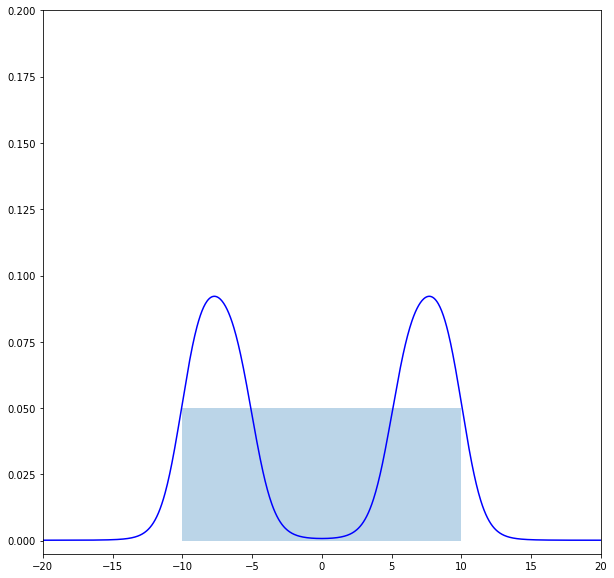

********************
bw = 2.8


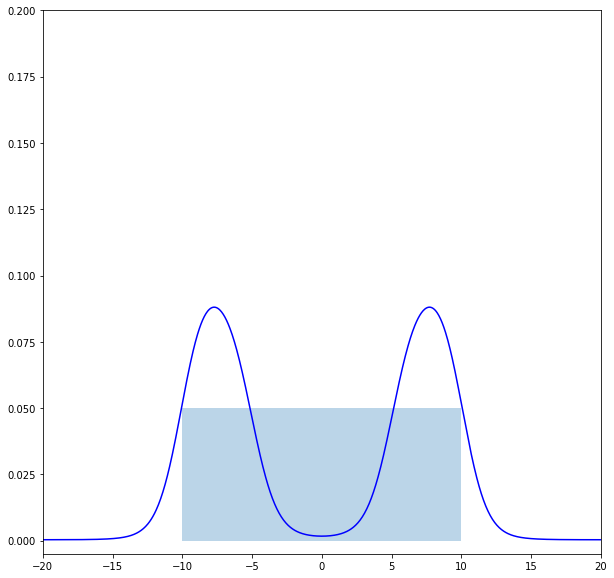

********************
bw = 2.9


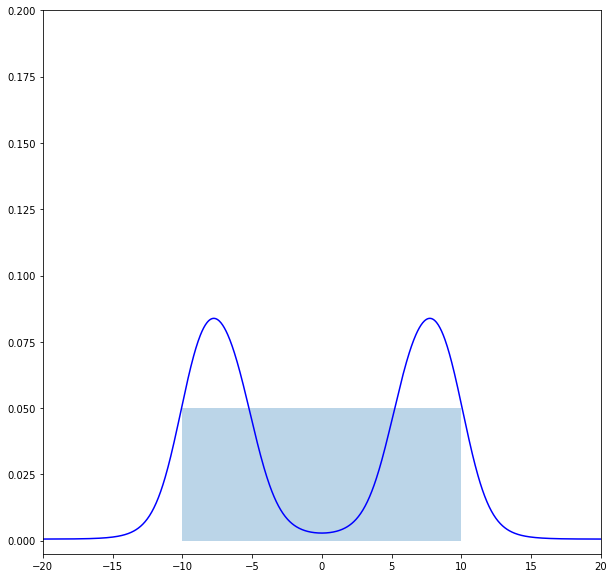

********************
bw = 3.0


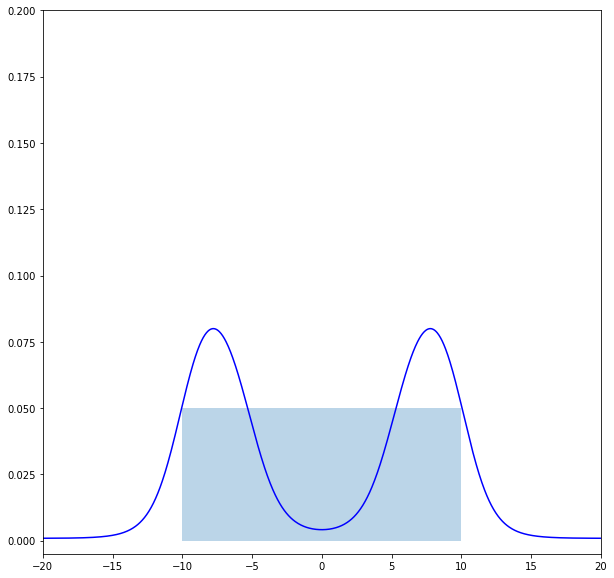

********************
bw = 10.0


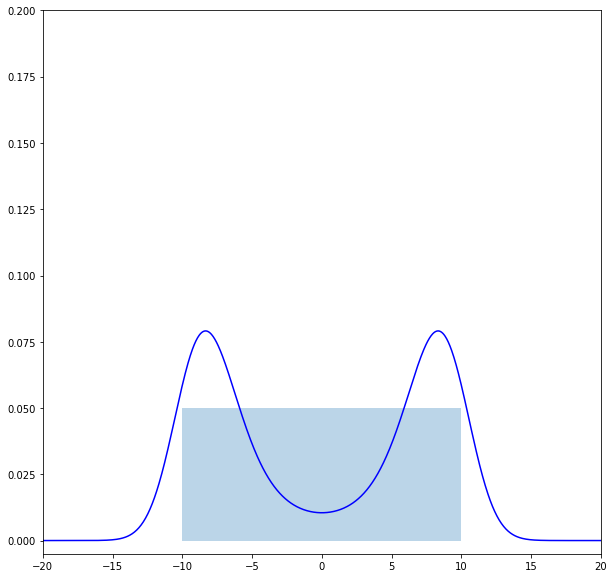

********************
bw = 20.0


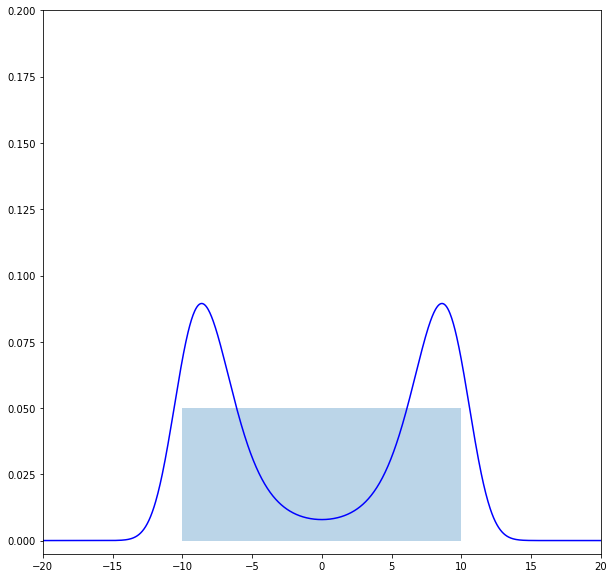

In [179]:
for bw in [1.5, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 10.0, 20.0]: 
    
    print('*' * 20)
    print(f'bw = {bw}')
    den_vals = np.load(f'denvals_scorematching_bw={bw}_data.npy')
    plt.figure(figsize = (10, 10))
    plt.plot(x0, den_vals, 'b-')
    plt.xlim(plot_domain)
    plt.ylim(ylimit)
    plt.hist(df.flatten(), density = True, bins = 'fd', alpha = 0.3)
    plt.show()


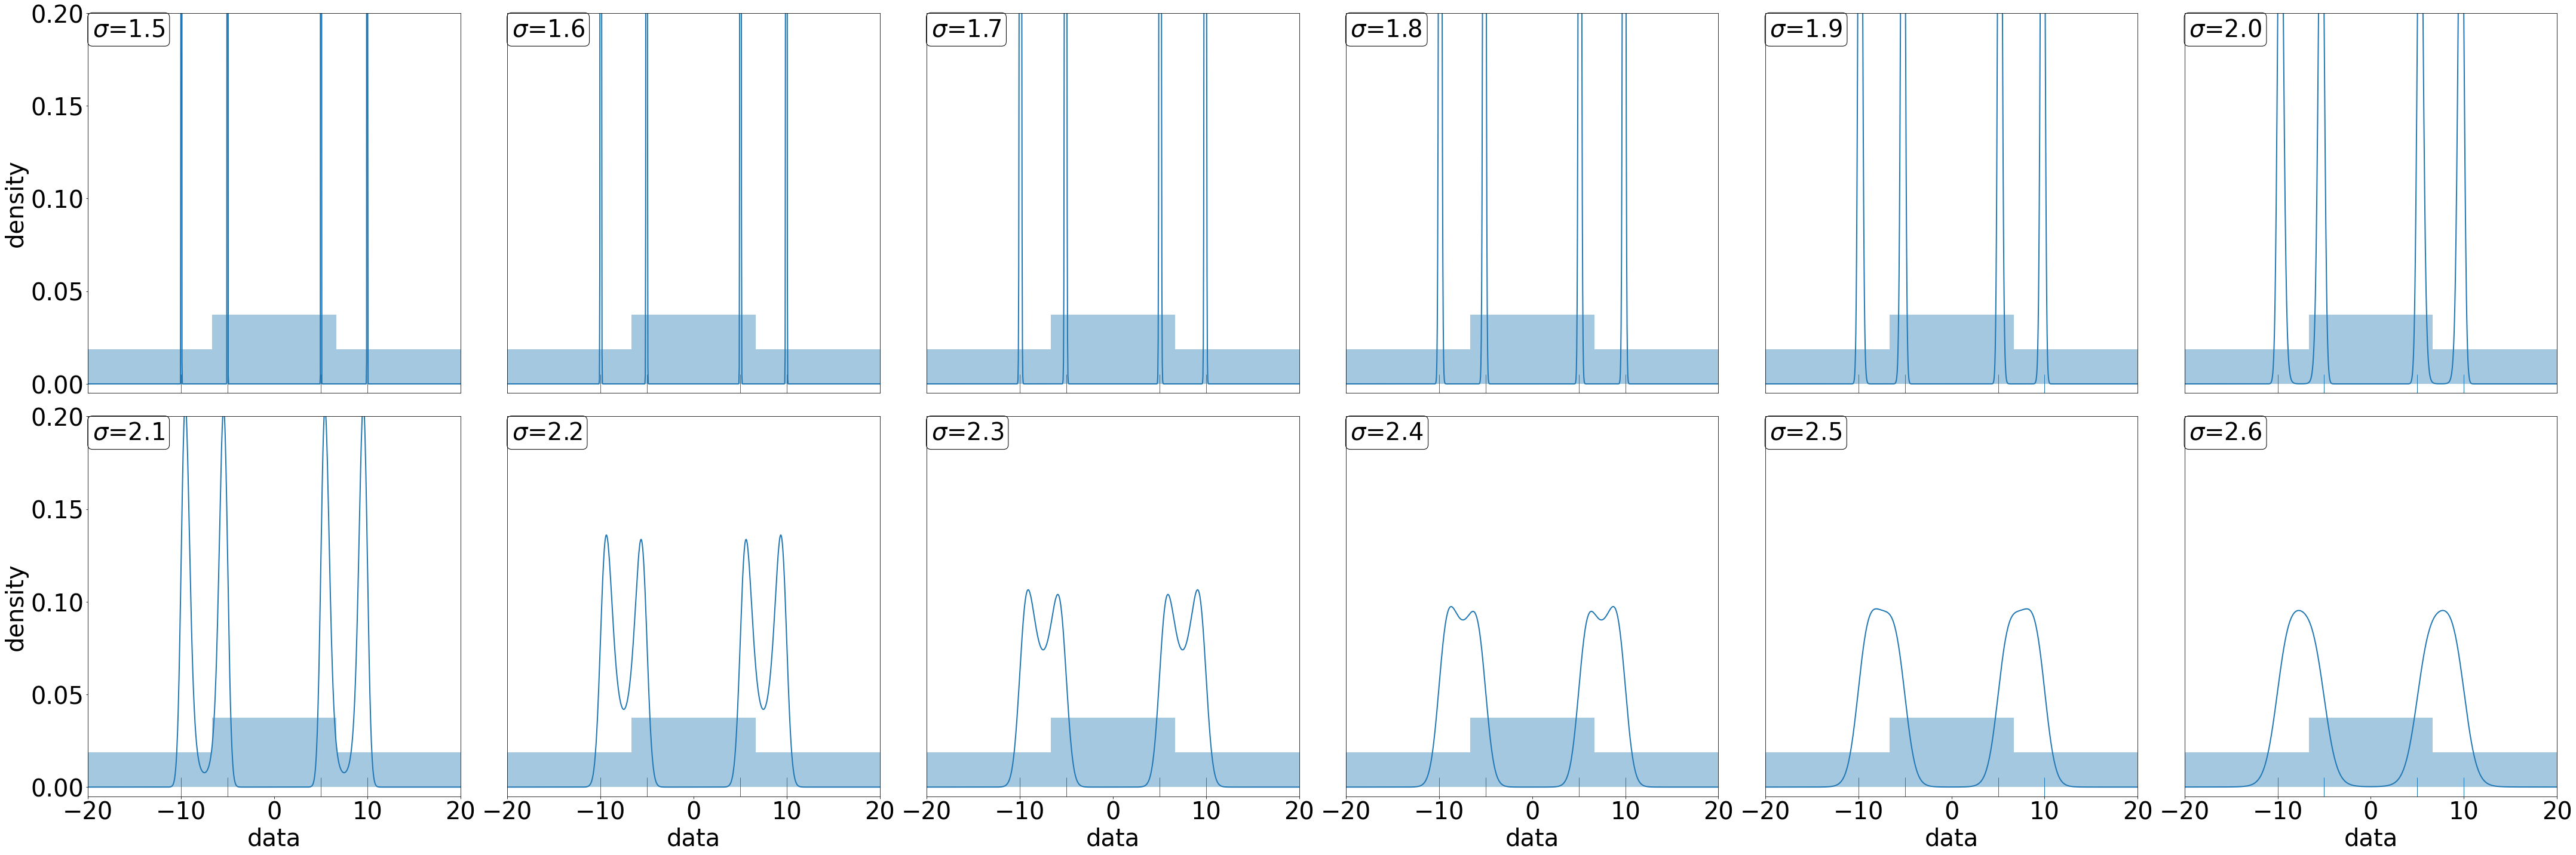

In [250]:
newx = np.linspace(xlimit[0], xlimit[1], plot_pts_cnt).reshape(-1, 1)

fig = plt.figure(constrained_layout=False)

basisfunction_name = 'Gaussian'
fig.set_figheight(20)
fig.set_figwidth(60)
ncols = 6
nrows = 2
fontsize = 40
fontsize1 = 40
linewidth = 2.0
var_name = 'data'

spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)
bw_list1 = [1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
bw_list2 = [2.1, 2.2, 2.3, 2.4, 2.5, 2.6]

for i in range(ncols): 
    bw = bw_list1[i]
    ax = fig.add_subplot(spec[0, i])
    denvals = np.load(f'denvals_scorematching_bw={bw}_data.npy')

    ax.plot(x0.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)
    seaborn.rugplot(df, axis = 'x', ax = ax)
    
    ax.hist(df.flatten(),
            color='tab:blue',
            bins='fd',
            range=xlimit,
            density=True,
            alpha=0.4)
    if i == 0: 
        ax.set_ylabel(r'density', fontsize = fontsize)
    ax.set_xlim(xlimit)
    ax.set_ylim(ylimit)
    # ax.axvline(108., 0, 1, ls = '--', color = 'tab:purple', alpha = 0.5)
    # ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimits)
    ax.tick_params(axis = 'both', labelsize = fontsize)
    ax.set_xticks([])
    if i != 0: 
        ax.set_yticks([])
    #ax.set_xlabel(var_name, fontsize = fontsize)

    info = r"$\sigma$={bw}".format(bw = bw)

    ax.text(0.012, 0.988,
            info,
            fontsize = fontsize1,
            multialignment = 'left',
            horizontalalignment = 'left',
            verticalalignment = 'top',
            transform = ax.transAxes,
            bbox = {'facecolor': 'none',
                    'boxstyle': 'Round, pad=0.2'})

for i in range(ncols): 
    bw = bw_list2[i]
    ax = fig.add_subplot(spec[1, i])
    denvals = np.load(f'denvals_scorematching_bw={bw}_data.npy')

    ax.plot(x0.flatten(), denvals.flatten(), color = 'tab:blue', linewidth = linewidth)
    seaborn.rugplot(df, axis = 'x', ax = ax)
    
    ax.hist(df.flatten(),
            color='tab:blue',
            bins='fd',
            range=xlimit,
            density=True,
            alpha=0.4)
    if i == 0: 
        ax.set_ylabel(r'density', fontsize = fontsize)
    ax.set_xlim(xlimit)
    ax.set_ylim(ylimit)
    # ax.axvline(108., 0, 1, ls = '--', color = 'tab:purple', alpha = 0.5)
    # ax.tick_params(axis = 'both', labelsize = fontsize)
    # ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimits)
    ax.tick_params(axis = 'both', labelsize = fontsize)
    #ax.set_xticks([])
    if i != 0: 
        ax.set_yticks([])
    ax.set_xlabel(var_name, fontsize = fontsize)

    info = r"$\sigma$={bw}".format(bw = bw)

    ax.text(0.012, 0.988,
            info,
            fontsize = fontsize1,
            multialignment = 'left',
            horizontalalignment = 'left',
            verticalalignment = 'top',
            transform = ax.transAxes,
            bbox = {'facecolor': 'none',
                    'boxstyle': 'Round, pad=0.2'})
    
plt.tight_layout()

plt.savefig('4points_basisfunction_sigma.pdf')